In [4]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

print('Pandas Version:',pd. __version__)
print('Numpy Version:',np. __version__)
print('Seaborn Version:',sns. __version__)

Pandas Version: 1.2.4
Numpy Version: 1.20.1
Seaborn Version: 0.11.1


In [8]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [2]:
# Read Loan Datset 
loan_df = pd.read_csv('loan.csv')

# Print column name
print('Column Names before cleaning \n', loan_df.columns)

Column Names before cleaning 
 Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### Data understanding
#### We can see that data contains below type of variables :

- Demographic variables : Those which are related to the applicant, such as age, occupation, employment details etc.
- Loan characteristics : amount of loan, interest rate, purpose of loan etc.
- Customer behavior variables : which are generated after the loan is approved.These variables are not available at the time of loan application, and thus they cannot be used as predictors for loan approval. 


### Data Cleaning

In [3]:
# Loan 'current' are neither fully paid not defaulted, so we can remove these applicants

loan_df = loan_df[~(loan_df['loan_status']=='Current')]
print('Shape of dataset after removing applicants having loan status current', loan_df.shape)

Shape of dataset after removing applicants having loan status current (38577, 111)


In [4]:
# Removing Customer behavior variables
behavioral_columns = ['delinq_2yrs',
                      'earliest_cr_line',
                      'inq_last_6mths',
                      'open_acc',
                      'pub_rec',
                      'revol_bal',
                      'revol_util',
                      'total_acc',
                      'out_prncp',
                      'out_prncp_inv',
                      'total_pymnt',
                      'total_pymnt_inv',
                      'total_rec_prncp',
                      'total_rec_int',
                      'total_rec_late_fee',
                      'recoveries',
                      'collection_recovery_fee',
                      'last_pymnt_d',
                      'last_pymnt_amnt',
                      'last_credit_pull_d',
                      'application_type',
                      'mths_since_last_delinq']
loan_df1 = loan_df.drop(behavioral_columns, axis = 1)
loan_df1.shape


(38577, 89)

In [5]:
#  Checking null columns
null_col = []
print('Percentage of null values in column(s): ')
for col in loan_df1.columns:
    null_percentage = (loan_df1[col].isnull().sum()/len(loan_df1))*100
    print(col, '=>', null_percentage)
    if null_percentage >= 90:
        null_col.append(col)
    
print('\n Completely Null Columns: \n', null_col)

# Removing Null columns 
loan_df2 = loan_df1.drop(null_col, axis = 1)
loan_df2.shape

print(loan_df2.describe())

print(loan_df2.describe(include=([object])))

Percentage of null values in column(s): 
id => 0.0
member_id => 0.0
loan_amnt => 0.0
funded_amnt => 0.0
funded_amnt_inv => 0.0
term => 0.0
int_rate => 0.0
installment => 0.0
grade => 0.0
sub_grade => 0.0
emp_title => 6.185032532337922
emp_length => 2.6777613603960906
home_ownership => 0.0
annual_inc => 0.0
verification_status => 0.0
issue_d => 0.0
loan_status => 0.0
pymnt_plan => 0.0
url => 0.0
desc => 32.472716903854625
purpose => 0.0
title => 0.028514399771884805
zip_code => 0.0
addr_state => 0.0
dti => 0.0
mths_since_last_record => 92.8973222386396
initial_list_status => 0.0
next_pymnt_d => 100.0
collections_12_mths_ex_med => 0.14516421702050444
mths_since_last_major_derog => 100.0
policy_code => 0.0
annual_inc_joint => 100.0
dti_joint => 100.0
verification_status_joint => 100.0
acc_now_delinq => 0.0
tot_coll_amt => 100.0
tot_cur_bal => 100.0
open_acc_6m => 100.0
open_il_6m => 100.0
open_il_12m => 100.0
open_il_24m => 100.0
mths_since_rcnt_il => 100.0
total_bal_il => 100.0
il_util =

In [6]:
# Removing unnecessary columns which contains either zero value(NUmerical Column)  
# or single category(categorical column) which can not help us in our analysis
# Also droping columns id, url, zip code,  state. As these contain demographic data
cols_to_drop = ['id',
                'member_id',
                'funded_amnt',
                'collections_12_mths_ex_med',
                'policy_code',
                'acc_now_delinq',
                'chargeoff_within_12_mths',
                'delinq_amnt',
                'tax_liens',
                'sub_grade',
                'pymnt_plan',
                'emp_title',
                'url',
                'desc',
                'title',
                'zip_code',
                'addr_state',
                'initial_list_status']
loan_df3 = loan_df2.drop(cols_to_drop, axis = 1)
print(loan_df3.shape)

print(loan_df3.describe())

print(loan_df3.describe(include=([object])))

(38577, 15)
          loan_amnt  funded_amnt_inv   installment    annual_inc  \
count  38577.000000     38577.000000  38577.000000  3.857700e+04   
mean   11047.025430     10222.481123    322.466318  6.877797e+04   
std     7348.441646      7022.720644    208.639215  6.421868e+04   
min      500.000000         0.000000     15.690000  4.000000e+03   
25%     5300.000000      5000.000000    165.740000  4.000000e+04   
50%     9600.000000      8733.440000    277.860000  5.886800e+04   
75%    15000.000000     14000.000000    425.550000  8.200000e+04   
max    35000.000000     35000.000000   1305.190000  6.000000e+06   

                dti  pub_rec_bankruptcies  
count  38577.000000          37880.000000  
mean      13.272727              0.043479  
std        6.673044              0.204583  
min        0.000000              0.000000  
25%        8.130000              0.000000  
50%       13.370000              0.000000  
75%       18.560000              0.000000  
max       29.990000    

### Data Manipulation : 
#### 1)  Missing Value Imputation 
- It is observed from the remaining columns emp_length  and pub_rec_bankruptcies  have missing values. 

In [7]:
# Check Null percentage for columns
(loan_df3.isnull().sum()/len(loan_df3))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [8]:
# Replacing null emp_length values with 'unknown'
loan_df3['emp_length'] = loan_df3['emp_length'].fillna('unknown')

# Relacing null pub_rec_bankruptcies with median
loan_df3['pub_rec_bankruptcies'].fillna(0, inplace = True)

# Current Size of data set
print(loan_df3.shape)

(38577, 15)


#### 2)  DataType Conversion

In [9]:
# Removing % from int rate column and changing type as float

loan_df3['int_rate'] = loan_df3['int_rate'].apply(lambda x : float(x.replace('%','')))
loan_df3['int_rate'].describe()

# Create month and year from issue date columns

loan_df3['issue_d'] = pd.to_datetime(loan_df3['issue_d'],format = '%b-%y')
loan_df3['issue_year'] =loan_df3['issue_d'].dt.year
loan_df3['issue_month'] =loan_df3['issue_d'].dt.month

#### 2)  Outlier treatment

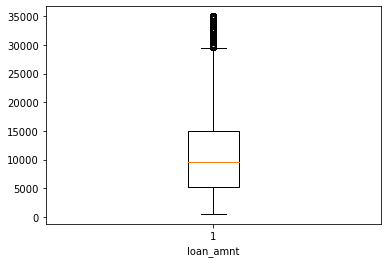

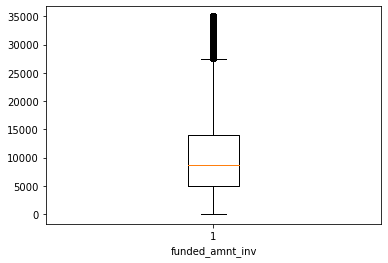

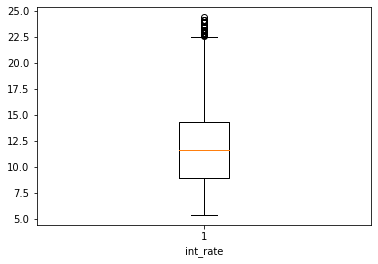

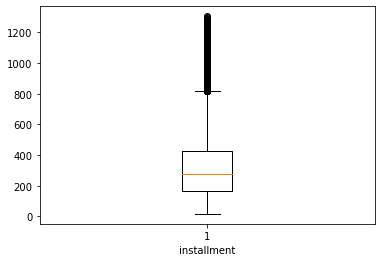

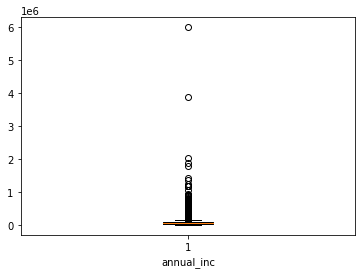

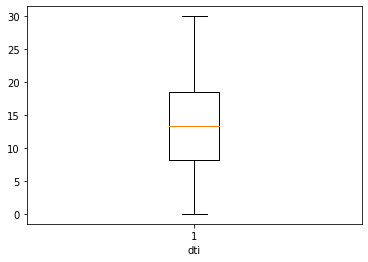

In [10]:
# From boxplot of features we find out that Annual Income has highest number of outliers.

numerical_col = ['loan_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti']

for i in numerical_col:
    plt.boxplot(loan_df3[i])
    plt.xlabel(i)
    plt.show()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
0.50     58868.0
0.75     82000.0
0.80     90000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64


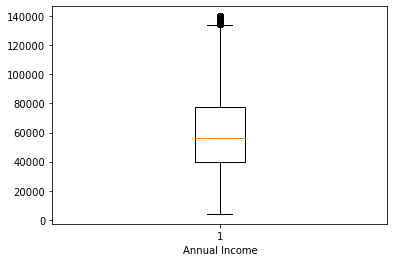

In [11]:
# annual income contains high number of outlier, 
# lets remove them first by checking quantile percentage

print(loan_df3['annual_inc'].describe())
print(loan_df3['annual_inc'].quantile([0.5, 0.75,0.80,0.90, 0.95, 0.97,0.98, 0.99]))

# removing outlieres from Annual Income after 95% quantile 
loan_df5 = loan_df3[loan_df3['annual_inc']<=140000]
plt.boxplot(loan_df5['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

### Data analysis 

Fully Paid     31226
Charged Off     5416
Name: loan_status, dtype: int64


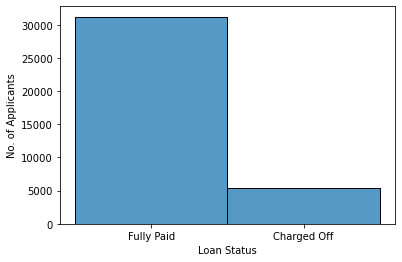

In [12]:
# Loan Status distibution

print(loan_df5['loan_status'].value_counts())

sns.histplot(loan_df5['loan_status'])
plt.xlabel('Loan Status')
plt.ylabel('No. of Applicants')
plt.show()

# From the loan Status distribution we can say that around 14% applicants are charged off.

debt_consolidation    17301
credit_card            4782
other                  3696
home_improvement       2555
major_purchase         2045
small_business         1623
car                    1448
wedding                 892
medical                 640
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: purpose, dtype: int64


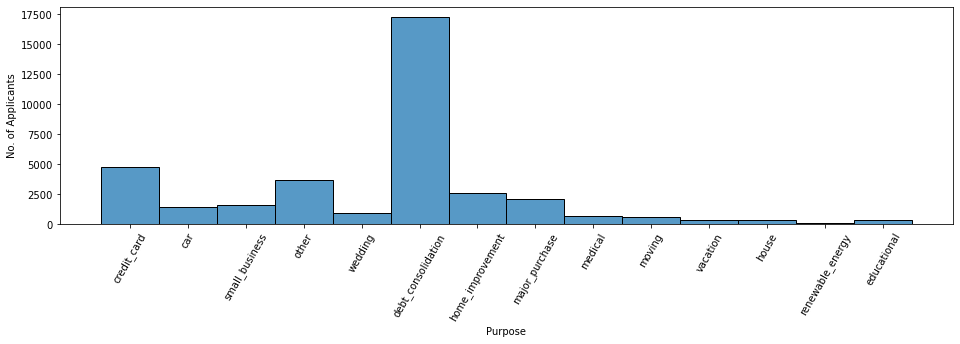

In [13]:
# Loan Purpose distibution

print(loan_df5['purpose'].value_counts())

plt.figure(figsize=(16,4))
sns.histplot(loan_df5['purpose'])
plt.xlabel('Purpose')
plt.xticks(rotation = 60)
plt.ylabel('No. of Applicants')
plt.show()

# From the Loan Purpose we can say that maximum loan are applied for Debt Consolidation 

In [14]:
# creating catogories from numerical columns through bucketing 

loan_df5['loan_amnt_grp'] = pd.cut(loan_df5['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df5['funded_amnt_inv_grp'] = pd.cut(loan_df5['funded_amnt_inv'],bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df5['int_rate_grp'] = pd.cut(loan_df5['int_rate'],bins=5,precision =0,labels=['0-5','5-10','10-15','15-20','20-25'])
loan_df5['installment_grp'] = pd.cut(loan_df5['installment'], bins=7,precision =0,labels=['0-200','200-400','400-600','600-800','800-1000','1000-1200','1200-1400'])
loan_df5['annual_inc_grp'] = pd.cut(loan_df5['annual_inc'],[0,20000,40000,60000,80000,100000] ,labels=['0-20k','20k-40k','40k-60k','60k-80k','80k+'])
loan_df5['dti_grp'] = pd.cut(loan_df5['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

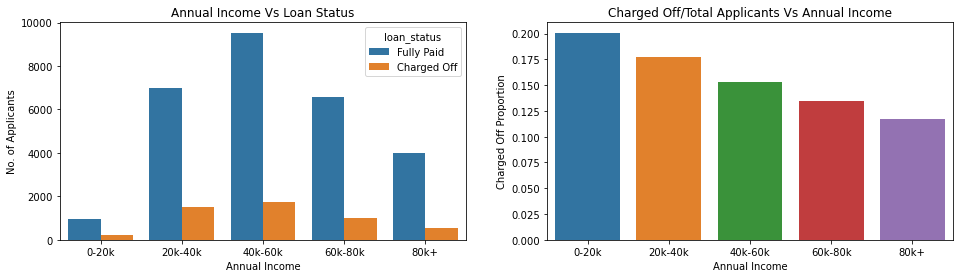

In [15]:
# Relation with Annual Income and Loan Status

annual_loan = loan_df5.groupby(loan_df5['annual_inc_grp'])['loan_status'].value_counts().unstack().reset_index()
annual_loan['total'] = annual_loan['Charged Off']+annual_loan['Fully Paid']
annual_loan['defaulter/total'] = annual_loan['Charged Off'] / annual_loan['total']

figure, axis = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(x = 'annual_inc_grp', data = loan_df5, hue =  'loan_status', ax = axis[0])
axis[0].set_title('Annual Income Vs Loan Status')
axis[0].set_xlabel('Annual Income')
axis[0].set_ylabel('No. of Applicants')

sns.barplot(x = 'annual_inc_grp', y = 'defaulter/total', data = annual_loan, ax = axis[1])
axis[1].set_title('Charged Off/Total Applicants Vs Annual Income')
axis[1].set_xlabel('Annual Income')
axis[1].set_ylabel('Charged Off Proportion')

plt.show()

# Relation with Annual income clearly shows that Lower income group has high number of charged off 
# and as income is increasing Charged off Proportion is decreasing. 

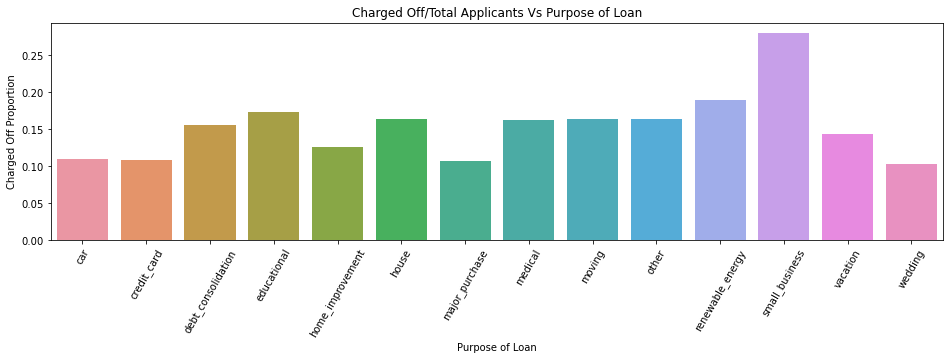

In [16]:
# Relation with Purpose and Loan Status

purpose_loan = loan_df5.groupby(loan_df5['purpose'])['loan_status'].value_counts().unstack().reset_index()
purpose_loan['total'] = purpose_loan['Charged Off']+purpose_loan['Fully Paid']
purpose_loan['defaulter/total'] = purpose_loan['Charged Off'] / purpose_loan['total']

plt.figure(figsize=(16, 4))
sns.barplot(x = 'purpose', y = 'defaulter/total', data = purpose_loan)
plt.xlabel('Purpose of Loan')
plt.ylabel('Charged Off Proportion')
plt.title('Charged Off/Total Applicants Vs Purpose of Loan')
plt.xticks(rotation = 60)
plt.show()

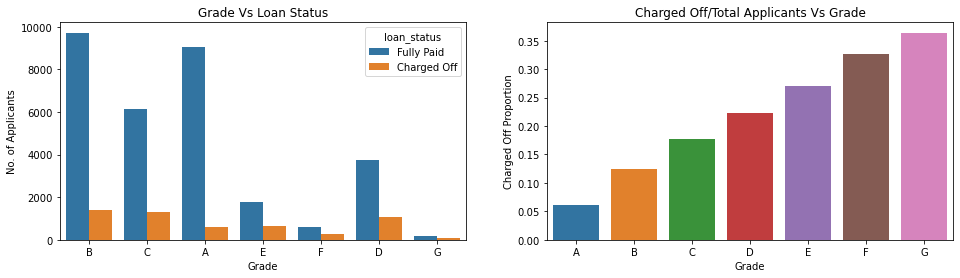

In [17]:
# Relation with Grade and Loan 

grade_loan = loan_df5.groupby(loan_df5['grade'])['loan_status'].value_counts().unstack().reset_index()
grade_loan['total'] = grade_loan['Charged Off']+grade_loan['Fully Paid']
grade_loan['defaulter/total'] = grade_loan['Charged Off'] / grade_loan['total']

figure, axis = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(x = 'grade', data = loan_df5, hue =  'loan_status', ax = axis[0] )
axis[0].set_title('Grade Vs Loan Status')
axis[0].set_xlabel('Grade')
axis[0].set_ylabel('No. of Applicants')

sns.barplot(x = 'grade', y = 'defaulter/total', data = grade_loan, ax = axis[1])
axis[1].set_title('Charged Off/Total Applicants Vs Grade')
axis[1].set_xlabel('Grade')
axis[1].set_ylabel('Charged Off Proportion')
plt.show()

# G category have high number of loan defaulters

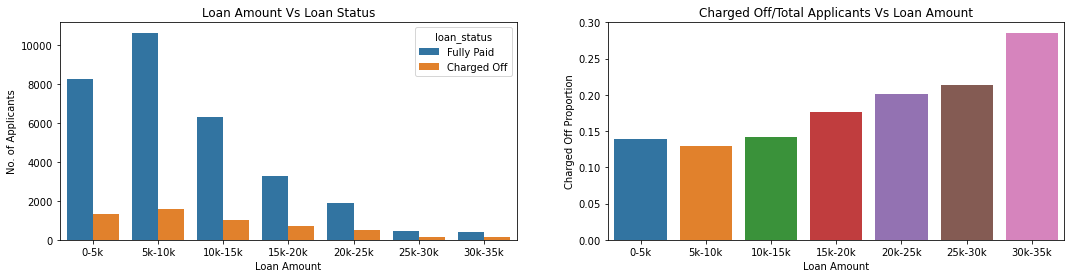

In [18]:

# Loan Amount versus Loan Status

amt_loan = loan_df5.groupby(loan_df5['loan_amnt_grp'])['loan_status'].value_counts().unstack().reset_index()
amt_loan['total'] = amt_loan['Charged Off']+amt_loan['Fully Paid']
amt_loan['defaulter/total'] = amt_loan['Charged Off'] / amt_loan['total']

figure, axis = plt.subplots(1, 2, figsize=(18, 4))
sns.countplot(x = 'loan_amnt_grp', data = loan_df5, hue =  'loan_status', ax = axis[0], )
axis[0].set_title('Loan Amount Vs Loan Status')
axis[0].set_xlabel('Loan Amount')
axis[0].set_ylabel('No. of Applicants')

sns.barplot(x = 'loan_amnt_grp', y = 'defaulter/total', data = amt_loan, ax = axis[1])
axis[1].set_title('Charged Off/Total Applicants Vs Loan Amount')
axis[1].set_xlabel('Loan Amount')
axis[1].set_ylabel('Charged Off Proportion')
plt.show()

# From these plots we analyse that Most Defaulters are from Loan Amount range of 30K-35K


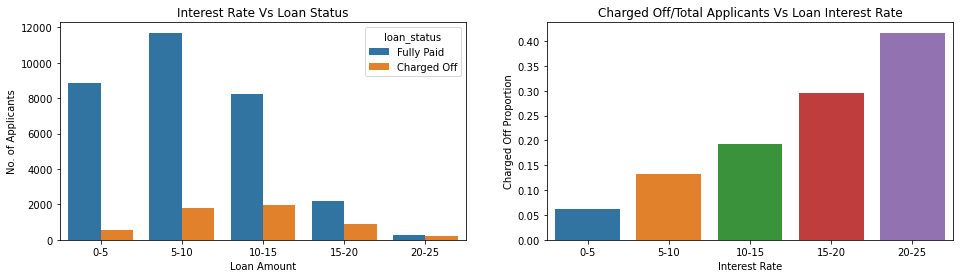

In [19]:
# Relation with Interest Rate of Loan 

roi_loan = loan_df5.groupby(loan_df5['int_rate_grp'])['loan_status'].value_counts().unstack().reset_index()
roi_loan['total'] = roi_loan['Charged Off']+roi_loan['Fully Paid']
roi_loan['defaulter/total'] = roi_loan['Charged Off'] / roi_loan['total']

figure, axis = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(x = 'int_rate_grp', data = loan_df5, hue =  'loan_status', ax = axis[0] )
axis[0].set_title('Interest Rate Vs Loan Status')
axis[0].set_xlabel('Loan Amount')
axis[0].set_ylabel('No. of Applicants')

sns.barplot(x = 'int_rate_grp', y = 'defaulter/total', data = roi_loan, ax = axis[1])
axis[1].set_title('Charged Off/Total Applicants Vs Loan Interest Rate')
axis[1].set_xlabel('Interest Rate')
axis[1].set_ylabel('Charged Off Proportion')
plt.show()

# Interest rate analysis shows that loan defaulters increasing with rate of interest. 
# Most defaulters are from interest rate of range  20-25.

In [20]:
loan_df5.corr()

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_year,issue_month
loan_amnt,1.000000,0.936901,0.291145,0.931488,0.403358,0.090237,-0.028946,0.105160,0.050095
funded_amnt_inv,0.936901,1.000000,0.288743,0.902616,0.382540,0.097037,-0.030540,0.249806,0.066475
int_rate,0.291145,0.288743,1.000000,0.269155,0.053952,0.111587,0.088120,0.034948,0.025015
installment,0.931488,0.902616,0.269155,1.000000,0.398460,0.079374,-0.026909,0.047994,0.027165
annual_inc,0.403358,0.382540,0.053952,0.398460,1.000000,-0.072526,-0.005109,0.038891,0.013834
dti,0.090237,0.097037,0.111587,0.079374,-0.072526,1.000000,0.005256,0.092885,0.016291
pub_rec_bankruptcies,-0.028946,-0.030540,0.088120,-0.026909,-0.005109,0.005256,1.000000,0.013240,-0.017808
issue_year,0.105160,0.249806,0.034948,0.047994,0.038891,0.092885,0.013240,1.000000,-0.033622
issue_month,0.050095,0.066475,0.025015,0.027165,0.013834,0.016291,-0.017808,-0.033622,1.000000


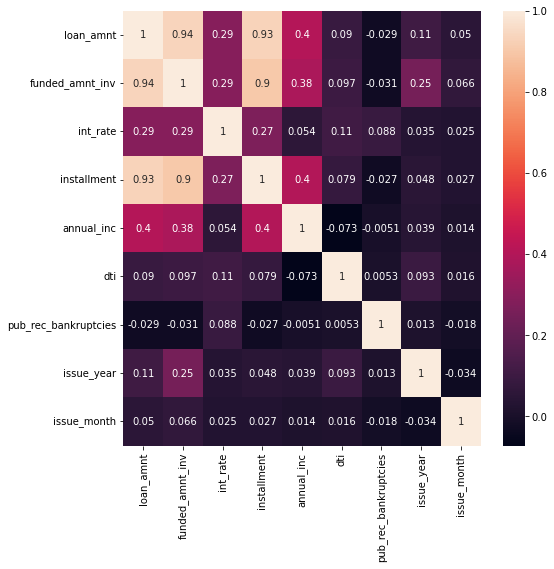

In [21]:
plt.figure(figsize = (8,8))
sns.heatmap(loan_df5.corr(),annot = True);

### Conclusion 

- Income range between 0-20K have high munber of defaulters. And As income increasing defaulter proportion is decreasing.
- Number of person taking loan are high for Debt Consolidation but proportion of defaulters are for Small Business.
  People from all the grade start small business or start-up and as we know the failure rate for startup is high     and also small business can be failure for different reason including proper market survey and competition etc. 
  So once failure it is diffilcult to manage the finances.As per the data the financial crisis in 2008 hit small
  businesses hard.There has been some increase in the number of small businesses in the U.S. and growth among small 
  business industries. Despite these positive trends, small business failure rates have increased by 40% from 2007
  to 2010. This loan data seems from 2007 to 2011 so depicting the picture.

- Proportion of defaulters increasing as we go from Grade 'A' to 'G'. Grade 'G' has high number of defaulters.
- High Rate of interest is also causing high number of Charged off
- Applicants having high number of Public Record of Bankruptancies are mostly Charged off

